# Performance Analysis for PSAIIM implementations
PDC - project


i220821 Muhammad Tahir

i228223 Sameed Ahmed Siddiqui

I221239 Tauha Imran

## Serial Implementation

Step 1: Parse and Extract Runtimes into a CSV

In [27]:
import re
import csv

# Read the entire content from the file
with open("serial_results_raw.txt", "r") as file:
    content = file.read()

# Find all blocks of interest using multiline regex
pattern = re.compile(
    r"NUM_NODES\s*=\s*(\d+).*?Total execution time\(without data loading time\):\s*(\d+)\s*ms",
    re.DOTALL
)

matches = pattern.findall(content)

# Convert matches to integers
results = [(int(nodes), int(time)) for nodes, time in matches]

# Write to CSV
with open("serial_runtime_parsed.csv", "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["NUM_NODES", "TOTAL_TIME_MS"])
    writer.writerows(results)

# Print the results
print("✅ Parsed Results:")
for num_nodes, exec_time in results:
    print(f"NUM_NODES = {num_nodes}, TOTAL_TIME_MS = {exec_time}")


✅ Parsed Results:
NUM_NODES = 2000, TOTAL_TIME_MS = 4861
NUM_NODES = 4000, TOTAL_TIME_MS = 10826
NUM_NODES = 6000, TOTAL_TIME_MS = 20083
NUM_NODES = 8000, TOTAL_TIME_MS = 33695


Step 2: Plot the Runtimes

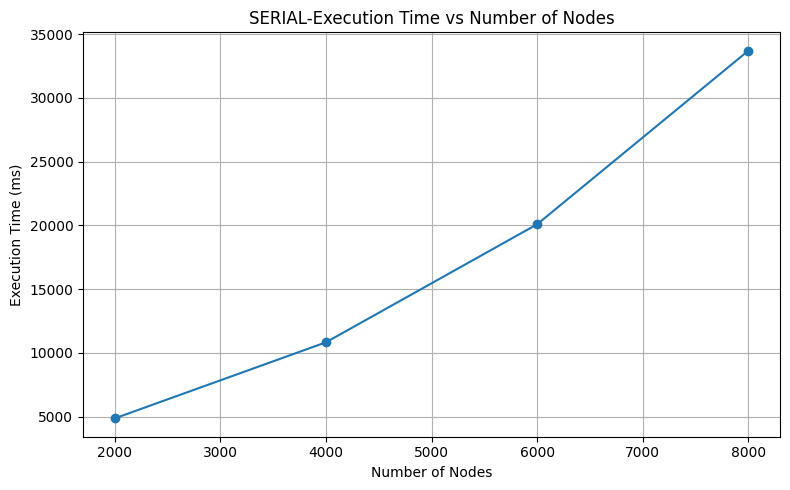

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("runtimes.csv")

# Plot
plt.figure(figsize=(8, 5))
plt.plot(df["NUM_NODES"], df["EXECUTION_TIME_MS"], marker='o')
plt.xlabel("Number of Nodes")
plt.ylabel("Execution Time (ms)")
plt.title("SERIAL-Execution Time vs Number of Nodes")
plt.grid(True)
plt.tight_layout()
plt.savefig("runtime_plot.png")  # Optional: Save the plot
plt.show()

## MPI Implementation

Part 1: Reading Data and Writing to CSV

In [11]:
import csv

# Function to read the data from the file
def read_data_from_file(filename):
    data = {
        "OpenMP+MPI": {},
        "Serial": {}
    }

    # Read the input text file and extract relevant data
    with open(filename, 'r') as file:
        lines = file.readlines()
        for line in lines:
            if "Data initialization time" in line:
                # Split the line by '#' to remove comments and then extract the time
                time_str = line.split(":")[1].split("#")[0].strip().replace(" ms", "")
                data["OpenMP+MPI"]["Initialization Time"] = int(time_str)
            elif "Total execution time" in line:
                # Split the line by '#' to remove comments and then extract the time
                time_str = line.split(":")[1].split("#")[0].strip().replace(" ms", "")
                data["OpenMP+MPI"]["Total Execution Time"] = int(time_str)
            elif "Dataset Size" in line:
                # Extracting dataset sizes and their corresponding execution times
                size = int(line.split(",")[0].split()[-1])
                exec_time = float(line.split(",")[1].strip())
                data["Serial"][size] = exec_time
    return data

# Function to write the extracted data to a CSV file
def write_to_csv(data, filename):
    with open(filename, mode='w', newline='') as file:
        writer = csv.writer(file)

        # Write OpenMP+MPI results
        writer.writerow(["Metric", "OpenMP+MPI (ms)"])
        writer.writerow(["Initialization Time", data["OpenMP+MPI"]["Initialization Time"]])
        writer.writerow(["Total Execution Time", data["OpenMP+MPI"]["Total Execution Time"]])

        # Write Serial results
        writer.writerow(["Dataset Size", "Serial Execution Time (s)"])
        for size, exec_time in data["Serial"].items():
            writer.writerow([size, exec_time])

# Main execution: Read data and save it to a CSV file
filename = "mpi_results_raw.txt"  # Input file containing the data
data = read_data_from_file(filename)  # Read data from the file
write_to_csv(data, "mpi_results.csv")  # Write data to CSV

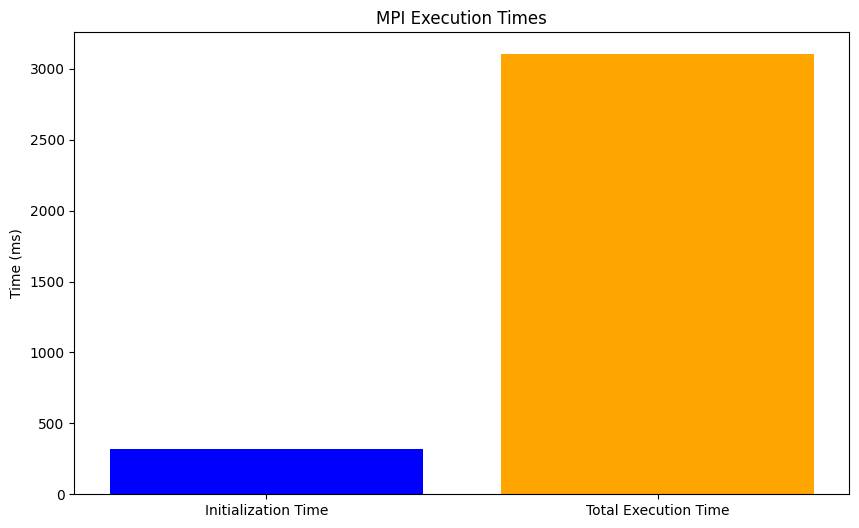

In [30]:
import matplotlib.pyplot as plt

# Function to plot the results
def plot_results(data):
    # OpenMP+MPI Results
    labels = ['Initialization Time', 'Total Execution Time']
    times = [data["OpenMP+MPI"]["Initialization Time"], data["OpenMP+MPI"]["Total Execution Time"]]

    # Plot OpenMP+MPI Times
    plt.figure(figsize=(10, 6))
    plt.bar(labels, times, color=['blue', 'orange'])
    plt.title("MPI Execution Times")
    plt.ylabel("Time (ms)")
    plt.show()

    # Serial Results: Plot Dataset Size vs Execution Time
    sizes = list(data["Serial"].keys())
    exec_times = list(data["Serial"].values())

# Plot the results (OpenMP+MPI and Serial)
plot_results(data)


## MPI + openMP Implementation

In [8]:
import csv
import re

# Specify the path to the input .txt file
input_file_path = "openmp_results.txt"  # Replace with the path to your .txt file

# Regex pattern to match the runtime lines
pattern = r"(Data initialization time: (\d+) ms|Total execution time\(without data loading time\): (\d+) ms)"

# Create a list to store the results
runtime_data = []

# Read the input data from the .txt file
with open(input_file_path, 'r') as file:
    input_data = file.read()

# Parse the input data
for line in input_data.splitlines():
    match = re.search(pattern, line)
    if match:
        if match.group(2):  # Data initialization time
            runtime_data.append(["Initialization Time", int(match.group(2))])
        elif match.group(3):  # Total execution time
            runtime_data.append(["Total Execution Time", int(match.group(3))])

# Writing to a CSV file
csv_file_path = 'openmp_results.csv'  # Output CSV file path
with open(csv_file_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Metric", "Time (ms)"])  # CSV header
    writer.writerows(runtime_data)

print(f"CSV file '{csv_file_path}' has been created.")


CSV file 'openmp_results.csv' has been created.


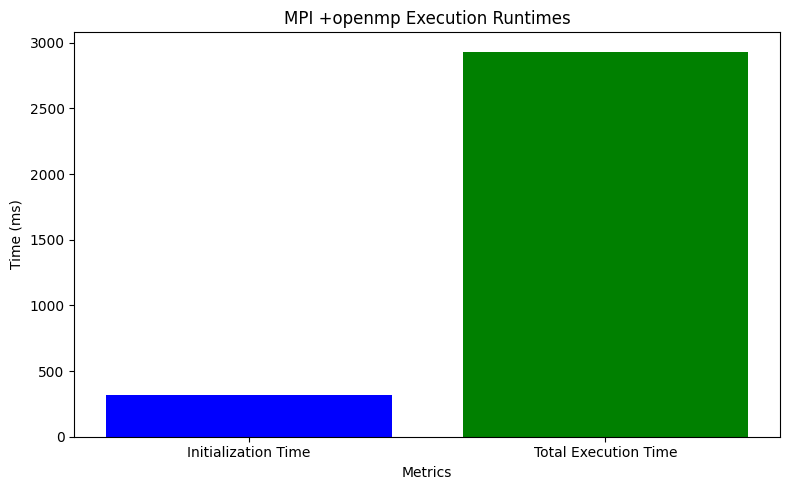

In [31]:
import matplotlib.pyplot as plt
import csv

# Read the CSV data
metrics = []
times = []

with open('openmp_results.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  # Skip header
    for row in reader:
        metrics.append(row[0])
        times.append(int(row[1]))

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(metrics, times, color=['blue', 'green'])

# Adding labels and title
plt.title('MPI +openmp Execution Runtimes')
plt.xlabel('Metrics')
plt.ylabel('Time (ms)')

# Show the plot
plt.tight_layout()
plt.show()


## Runtime Comparisions

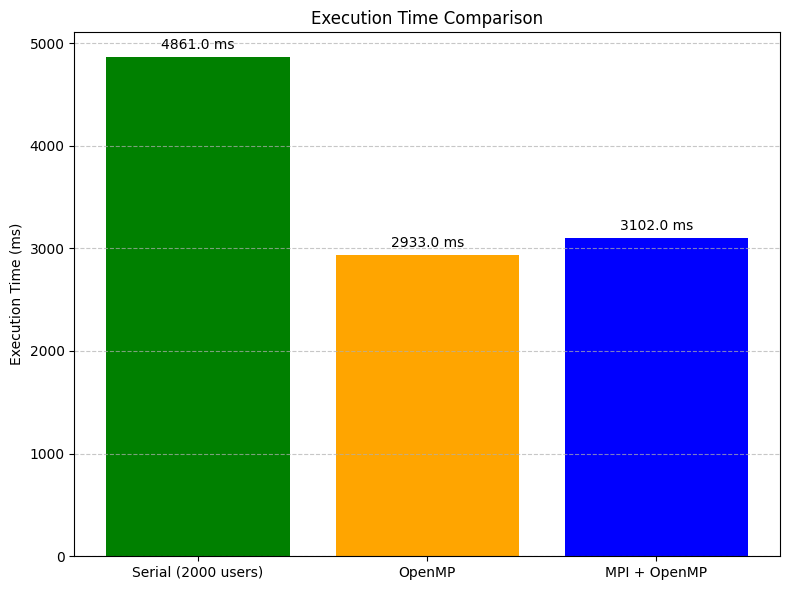

In [26]:
import matplotlib.pyplot as plt

# --- Execution times in milliseconds ---
serial_time_ms = 4861  # 2000 users (from serial_results.csv)
openmp_time_ms = 2933           # from openmp_results.csv
mpi_time_ms = 3102              # from mpi_results.csv

# --- Data for bar chart ---
labels = ['Serial (2000 users)', 'OpenMP', 'MPI + OpenMP']
times = [serial_time_ms, openmp_time_ms, mpi_time_ms]
colors = ['green', 'orange', 'blue']

# --- Plot ---
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, times, color=colors)

# Add time labels above bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 50, f'{height:.1f} ms',
             ha='center', va='bottom', fontsize=10)

# Titles and labels
plt.title('Execution Time Comparison')
plt.ylabel('Execution Time (ms)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Stats about Influential Nodes

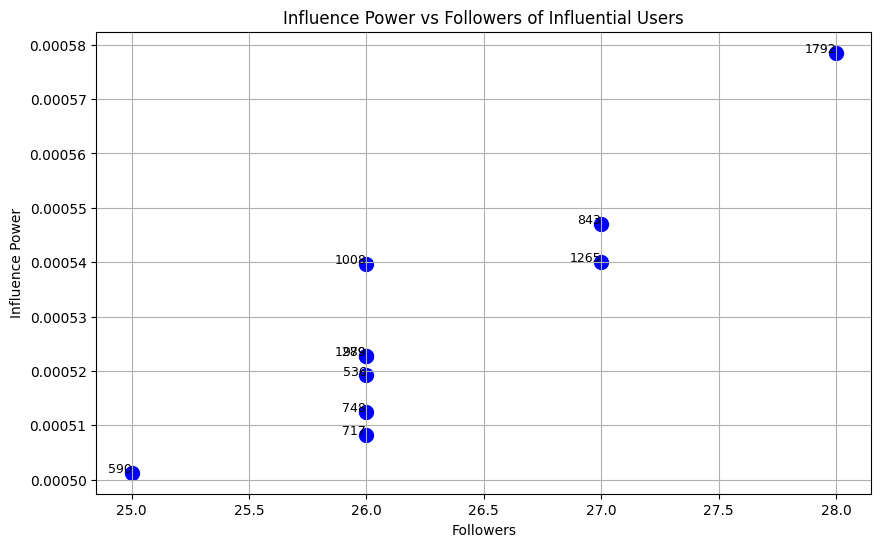

In [14]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Data for influential users
nodes = [
    {"id": 590, "followers": 25, "retweets": 4, "replies": 4, "mentions": 6, "influence_power": 0.000501255, "community_id": 0},
    {"id": 1008, "followers": 26, "retweets": 9, "replies": 9, "mentions": 3, "influence_power": 0.0005397, "community_id": 161},
    {"id": 748, "followers": 26, "retweets": 9, "replies": 6, "mentions": 5, "influence_power": 0.000512483, "community_id": 36},
    {"id": 1792, "followers": 28, "retweets": 10, "replies": 4, "mentions": 7, "influence_power": 0.000578542, "community_id": 884},
    {"id": 717, "followers": 26, "retweets": 5, "replies": 1, "mentions": 7, "influence_power": 0.000508284, "community_id": 0},
    {"id": 536, "followers": 26, "retweets": 4, "replies": 6, "mentions": 9, "influence_power": 0.00051919, "community_id": 0},
    {"id": 1289, "followers": 26, "retweets": 6, "replies": 7, "mentions": 6, "influence_power": 0.000522799, "community_id": 397},
    {"id": 843, "followers": 27, "retweets": 6, "replies": 10, "mentions": 5, "influence_power": 0.000547091, "community_id": 0},
    {"id": 979, "followers": 26, "retweets": 4, "replies": 6, "mentions": 10, "influence_power": 0.000522761, "community_id": 0},
    {"id": 1265, "followers": 27, "retweets": 7, "replies": 7, "mentions": 3, "influence_power": 0.000540107, "community_id": 374}
]

# Prepare data for plotting
ids = [node["id"] for node in nodes]
followers = [node["followers"] for node in nodes]
retweets = [node["retweets"] for node in nodes]
replies = [node["replies"] for node in nodes]
mentions = [node["mentions"] for node in nodes]
influence_power = [node["influence_power"] for node in nodes]

# Create a scatter plot to visualize the influence power against number of followers
plt.figure(figsize=(10, 6))
plt.scatter(followers, influence_power, color='blue', label='Influence Power vs Followers', s=100)

# Adding labels
for i, txt in enumerate(ids):
    plt.annotate(txt, (followers[i], influence_power[i]), fontsize=9, ha='right')

plt.title('Influence Power vs Followers of Influential Users')
plt.xlabel('Followers')
plt.ylabel('Influence Power')
plt.grid(True)
plt.show()




## Visualizing the graph of most influential nodes

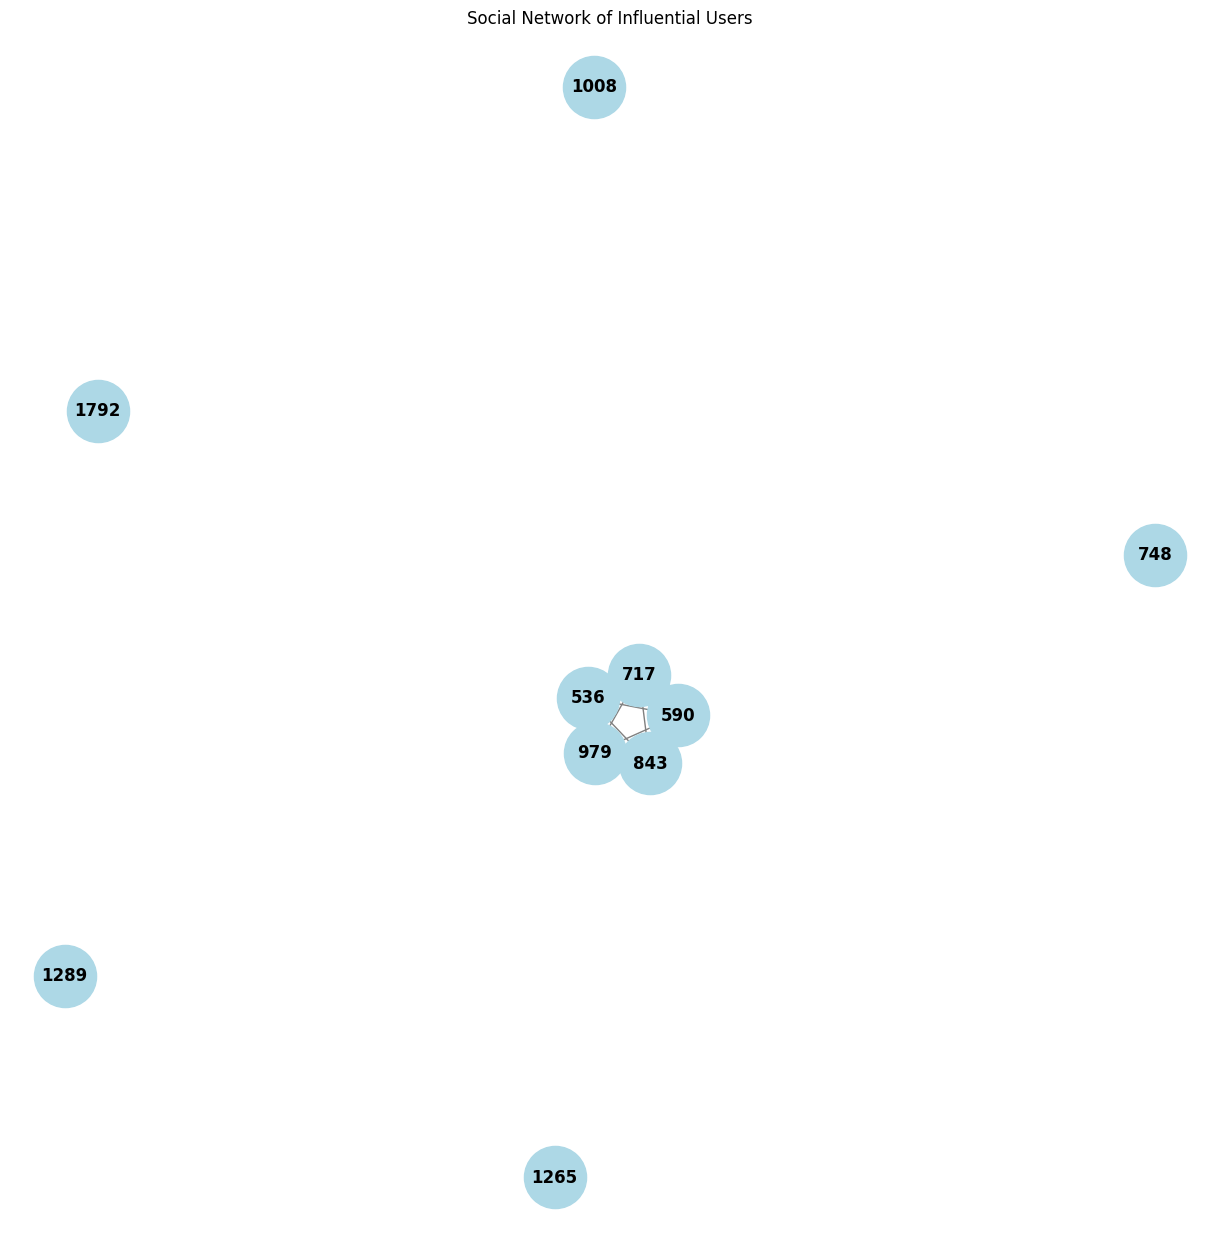

In [15]:
#  visualize the network of these nodes using NetworkX

# Create a graph
G = nx.Graph()

# Add nodes to the graph
for node in nodes:
    G.add_node(node["id"], influence_power=node["influence_power"], community=node["community_id"])

# Add edges (Example: assuming you have connections between nodes based on their communities)
for i in range(len(nodes)):
    for j in range(i + 1, len(nodes)):
        if nodes[i]["community_id"] == nodes[j]["community_id"]:
            G.add_edge(nodes[i]["id"], nodes[j]["id"])

# Draw the graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=12, font_weight='bold', edge_color='gray')
plt.title("Social Network of Influential Users")
plt.show()